In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing, model_selection
import xgboost as xgb
import warnings

In [2]:
def make_submission_prediction(model, X_train, y_train, scaler, csv=False):
    data = pd.read_csv('./test.csv')
    id_code = np.array(data.ID_code)
    X_test = np.array(scaler.transform(data.drop(['ID_code'], 1)))
    fpr, tpr, thresholds = metrics.roc_curve(y_train, model.predict(X_train))
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    pred = model.predict(X_test)
    pred = (pred > optimal_threshold).astype(int)
    pred = pd.DataFrame({'ID_code': id_code, 'target': pred})
    if csv:
        pred.to_csv('prediction.csv', index=False)
    return pred

In [3]:
def validate_prediction(model, X_train, y_train, X_val, y_val, scaler):
    X_test = np.array(scaler.transform(X_val))
    fpr, tpr, thresholds = metrics.roc_curve(y_train, model.predict(X_train))
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    pred = model.predict(X_test)
    pred = (pred > optimal_threshold).astype(int)
    print(metrics.roc_auc_score(y_val, pred))
    return pred

In [4]:
data = './train.csv'
data = pd.read_csv(data)
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
data.shape

(200000, 202)

In [5]:
X = data.drop(['target', 'ID_code'], 1)
y = data.target
prop = (y == 0).sum().astype(float)/(y == 1).sum()
1/prop

0.11171637891741058

In [6]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y)

In [11]:
QuantileScaler = preprocessing.QuantileTransformer(n_quantiles=10000)
QuantileScaler.fit(X_train)
X_train = QuantileScaler.transform(X_train)

In [12]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.499805,0.500073,0.499273,0.499541,0.500052,0.499614,0.499972,0.499194,0.500537,0.499813,...,0.500357,0.499750,0.499094,0.500349,0.499713,0.500402,0.500225,0.499748,0.500032,0.500487
std,0.288367,0.288907,0.288713,0.288528,0.288605,0.288647,0.288423,0.288834,0.288761,0.288402,...,0.289072,0.288854,0.288559,0.288977,0.288856,0.288732,0.288578,0.288288,0.288435,0.288769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249955,0.249619,0.249259,0.249449,0.249780,0.249501,0.250525,0.249104,0.250222,0.249955,...,0.250033,0.249244,0.249479,0.250083,0.248979,0.250403,0.250192,0.250325,0.250521,0.250098
50%,0.499823,0.500223,0.499217,0.499388,0.501060,0.499497,0.500350,0.498206,0.500619,0.500287,...,0.501037,0.499043,0.498421,0.500450,0.499485,0.501437,0.500502,0.500250,0.499979,0.500446
75%,0.749863,0.750088,0.749187,0.749423,0.750139,0.749654,0.749275,0.749996,0.750963,0.749327,...,0.751072,0.750207,0.748808,0.751190,0.749509,0.750165,0.750167,0.748540,0.749895,0.750691
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# for testing only
freq = 1
warnings.warn('You are working with data reduced {} times'.format(freq))
X_train = X_train[::freq]
X_val = X_val[::freq]
y_train = y_train[::freq]
y_val = y_val[::freq]
print(X_train.shape)

(15000, 200)


/home/grzegorz/anaconda3/envs/DeepLearning/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: You are working with data reduced 10 times
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
# params = {'objective':'binary:logistic', 'eval_metric': 'auc', 'n_jobs': 12, 'tree_method': 'hist', 'verbosity':1, 
#           'max_depth': 16, 'eta': 0.01, 'subsample': 0.5, 'min_obs_node': 1, 
#          }
# booster = xgb.XGBRegressor(**params)

In [37]:
# %timeit booster.fit(X_train, y_train)

9.7 s ± 708 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
params = {'objective':'binary:logistic', 'eval_metric': 'auc', 'n_jobs': 12, 'tree_method': 'gpu_hist', 'verbosity':1, 
          'max_depth': 16, 'eta': 0.01, 'subsample': 0.5, 'min_obs_node': 1, 'scale_pos_weight' : 1/prop
         }
booster_gpu = xgb.XGBRegressor(**params)

In [39]:
%time booster_gpu.fit(X_train, y_train)

6.61 s ± 48.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
metrics.roc_auc_score(y_true=y_val, y_score=booster_gpu.predict(QuantileScaler.transform(X_val)))

0.8362615367508062

In [71]:
# pred = make_submission_prediction(booster_gpu, X_train, y_train, csv=True)
# pred.head() 

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [ ]:
# this easy model without fine-tunning and with downsampled sized reached 0.50863 in submission validation and 0.63943
# without downsampling

In [75]:
validate_prediction(booster_gpu, X_train, y_train, X_val, y_val)

0.5


array([1, 1, 1, ..., 1, 1, 1])

In [14]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [46]:
pca = PCA(n_components=50, whiten=False, svd_solver='full')
pca.fit(X_train)
X_train = pca.transform(X_train)

[0.07134793 0.0309419  0.02762148 0.02690913 0.02488139 0.02288593
 0.02226317 0.02101519 0.02091122 0.02011503 0.0184108  0.0173838
 0.01695841 0.01686416 0.0167706  0.01355621 0.01310008 0.01253588
 0.01231515 0.01205616 0.01175351 0.01161999 0.01141311 0.0113603
 0.01124385 0.01101522 0.01073271 0.01068871 0.01047768 0.01041338
 0.00998523 0.00989578 0.00981598 0.00969042 0.00964842 0.00960359
 0.00956509 0.00949309 0.00936194 0.00917815 0.00901241 0.0089802
 0.00882806 0.00869936 0.00862634 0.00852613 0.0084117  0.00791432
 0.00703917 0.0070269 ]


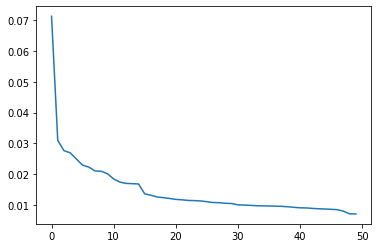

In [47]:
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)

In [7]:
MinMaxScaler = preprocessing.MinMaxScaler()
MinMaxScaler.fit(X_train)
X_train = MinMaxScaler.transform(X_train)

In [36]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.460618,0.477256,0.495368,0.485196,0.490966,0.477734,0.480210,0.495606,0.489981,0.471210,...,0.492768,0.488497,0.491470,0.496309,0.476405,0.471063,0.498002,0.486895,0.489421,0.485415
std,0.174109,0.141257,0.139915,0.145809,0.122466,0.127268,0.120878,0.133384,0.125066,0.124155,...,0.115085,0.118075,0.113299,0.121876,0.113765,0.114747,0.127013,0.118299,0.117102,0.121990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.328377,0.377676,0.396369,0.378226,0.407662,0.390055,0.396541,0.401372,0.403518,0.384295,...,0.414748,0.408441,0.414440,0.412926,0.399419,0.392954,0.411853,0.406378,0.410095,0.402340
50%,0.452863,0.475586,0.493821,0.484143,0.489764,0.476797,0.479308,0.496151,0.489656,0.469508,...,0.493219,0.488483,0.491266,0.495846,0.476623,0.470681,0.497739,0.486429,0.489271,0.485286
75%,0.595755,0.575433,0.592460,0.593080,0.573982,0.564798,0.563011,0.589757,0.575922,0.556687,...,0.571119,0.568327,0.568516,0.579306,0.553608,0.548986,0.583853,0.567174,0.568509,0.567954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
params = {'objective':'binary:logistic', 'eval_metric': 'auc', 'n_jobs': 12, 'tree_method': 'gpu_hist', 'verbosity':1, 
          'max_depth': 16, 'eta': 0.01, 'subsample': 0.5, 'min_obs_node': 1, 'scale_pos_weight' : 1/prop
         }
booster_gpu = xgb.XGBRegressor(**params)
%time booster_gpu.fit(X_train, y_train)

/home/grzegorz/anaconda3/envs/DeepLearning/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


CPU times: user 15.2 s, sys: 3.27 s, total: 18.5 s
Wall time: 15 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.01,
             eval_metric='auc', gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=16,
             min_child_weight=1, min_obs_node=1, missing=None, n_estimators=100,
             n_jobs=12, nthread=None, objective='binary:logistic',
             random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=0.11171637891741058, seed=None, silent=None,
             subsample=0.5, tree_method='gpu_hist', verbosity=1)

In [9]:
validate_prediction(booster_gpu, X_train, y_train, X_val, y_val, MinMaxScaler)

0.7602245766549903


array([1, 1, 0, ..., 0, 0, 0])

In [16]:
data = './train.csv'
data = pd.read_csv(data)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y)
Transformer = preprocessing.FunctionTransformer()
Transformer.fit(X_train)
X_train = Transformer.transform(X_train)
params = {'objective':'binary:logistic', 'eval_metric': 'auc', 'n_jobs': 12, 'tree_method': 'gpu_hist', 'verbosity':1, 
          'max_depth': 16, 'eta': 0.01, 'subsample': 0.5, 'min_obs_node': 1, 'scale_pos_weight' : 1/prop
         }
booster_gpu = xgb.XGBRegressor(**params)
%time booster_gpu.fit(X_train, np.array(y_train))
validate_prediction(booster_gpu, X_train, y_train, X_val, y_val, Transformer)

/home/grzegorz/anaconda3/envs/DeepLearning/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/home/grzegorz/anaconda3/envs/DeepLearning/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


CPU times: user 14.8 s, sys: 2.77 s, total: 17.6 s
Wall time: 14.2 s


/home/grzegorz/anaconda3/envs/DeepLearning/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


0.7579114353176495


array([0, 0, 0, ..., 0, 1, 0])